# Digit Classification using Multi-Class Perceptron

You need to change only 2 lines in the Jupyter notebook. Further, you can write your answer to the given space in the ```MultiClass.py``` file.

In this part of the assignment, you will implement a multi-class perceptron with the One-vs-All strategy to classify the digits in MNIST-1D dataset. You can learn more about the dataset here: https://github.com/greydanus/mnist1d 


You will use the momentum with SGD optimizer to optimize the loss to obtain the optimal weight matrix.


All the information you need for solving this assignment is in this notebook, and all of the code you will be implementing takes place in ```MultiClass.py``` script.


Warning: This assignment requires that you perform operations with matrices in Numpy (e.g., multiplication and summation of the column vectors of a matrix). You should learn how to use the operations needed to complete the assignment. You may check the documents in the following link on the usage of NumPy: https://numpy.org/doc/stable/

In [1]:
from urllib.request import urlopen
import numpy as np
import pickle


url = 'https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl'
data = pickle.load(urlopen(url))

print(data['x'].shape)
print(data['x_test'].shape)

print(data['y'].shape)
print(data['y_test'].shape)


(4000, 40)
(1000, 40)
(4000,)
(1000,)


In [2]:
import MultiClass

#################### Defining the basic parameters for the training #######################

# Learning rate
alpha = 0.001
# Momentum parameter for the optimizer
beta = 0.9
# Number of samples in a mini-batch
mb = 100

# Number of classes
F = data['x'].shape[1]  # Assuming each row is a sample and columns are features

# Determine the number of classes (n_class)
n_class = 9

# Number of Epochs
n_epochs = 60
# Show the evolution of training
info = 1

# Training the model
myperceptron = MultiClass.OneVsAll(data['x'], data['y'], data['x_test'], data['y_test'],
                                               alpha, beta, mb, n_class, F, n_epochs, info)
lr_weights, lr_loss, lr_acc = myperceptron.train()

Epoch: 0 | Duration: 0.0s | Train loss: 0.71198 | Train accuracy: 9.86111111111111% | Validation loss: 0.40762 | Validation accuracy: 12.75%
Epoch: 1 | Duration: 0.0s | Train loss: 0.77658 | Train accuracy: 10.38888888888889% | Validation loss: 0.4459 | Validation accuracy: 13.5%
Epoch: 2 | Duration: 0.0s | Train loss: 0.85983 | Train accuracy: 11.666666666666666% | Validation loss: 0.48539 | Validation accuracy: 13.750000000000002%
Epoch: 3 | Duration: 0.0s | Train loss: 0.96394 | Train accuracy: 15.444444444444445% | Validation loss: 0.52216 | Validation accuracy: 15.75%
Epoch: 4 | Duration: 0.0s | Train loss: 1.10024 | Train accuracy: 20.72222222222222% | Validation loss: 0.54816 | Validation accuracy: 19.5%
Epoch: 5 | Duration: 0.0s | Train loss: 1.29054 | Train accuracy: 27.22222222222222% | Validation loss: 0.55304 | Validation accuracy: 25.0%
Epoch: 6 | Duration: 0.0s | Train loss: 1.56576 | Train accuracy: 32.416666666666664% | Validation loss: 0.53551 | Validation accuracy: 31

In [3]:
# Evaluate the model with the testing set

myperceptron.test(lr_weights)

--------------------------------------------------
 Test accuracy is 12.3%


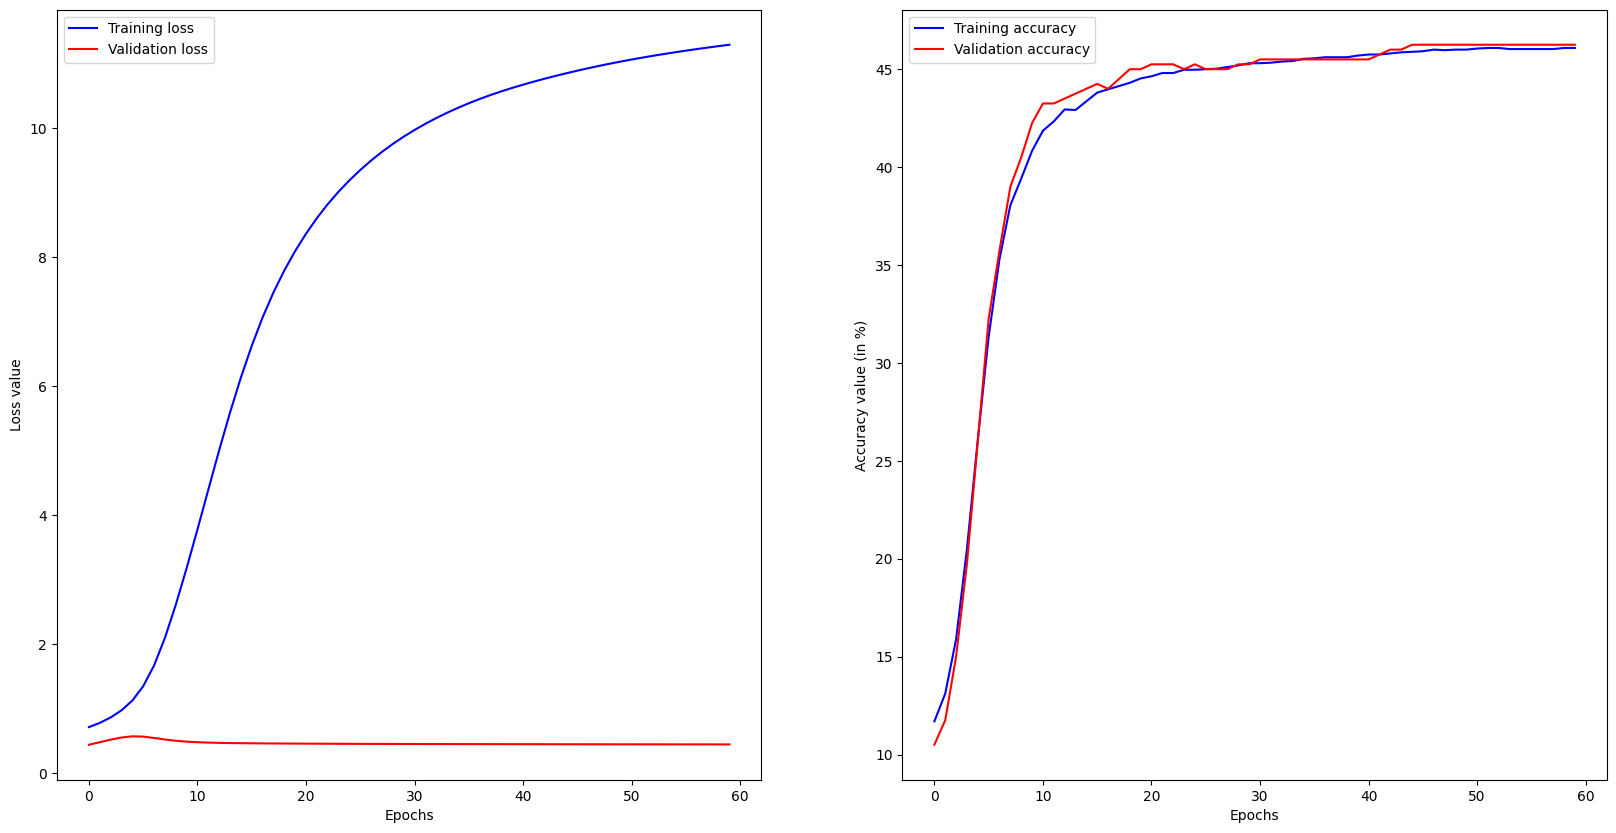

In [4]:
# Visualize training/validation loss and accuracy
MultiClass.visualizer(lr_loss, lr_acc, n_epochs)